# 📈 Fase 06: Conclusiones Estratégicas e Insights de Negocio
---
**Objetivo**: Consolidar los hallazgos técnicos de los 5 notebooks previos en recomendaciones accionables para la toma de decisiones a travez de 4 secciones.

## 1. Resumen de Hallazgos Críticos
* Objetivo: Sintetizar los tres pilares del fallo logístico detectados: peso, geografía y plazos de entrega, que afectan la eficiencia operativa, la satisfacción del cliente y la predictibilidad de entrega.
* Métricas Clave: `delta_estimated_days`, `product_weight_g`, y `customer_state`

##### 1.1. El Factor "Medianía Crítica" (Peso del Producto)
Los análisis muestran que Olist enfrenta un problema estructural relacionado con productos de peso intermedio, aquellos que no son lo suficientemente ligeros para aprovechar las rutas de mensajería estándar, pero tampoco lo suficientemente voluminosos para entrar en sistemas de carga pesada optimizados.
* Hallazgo clave:
Los pedidos con retrasos críticos presentan un peso promedio de **3.7 kg**, significativamente mayor que el promedio global de **2.2 kg**, lo que representa **un incremento del 62%**.
* Insight estratégico:
Los productos medianos se encuentran en una “tierra de nadie logística” donde los tiempos, tarifas y procesos no están optimizados. Este segmento debe ser priorizado mediante nuevas reglas de clasificación, acuerdos tarifarios específicos o centros de consolidación intermedios.
##### 1.2. El estado con mayor índice de incumpliento.
Los datos geográficos revelan que no todos los estados brasileños operan bajo las mismas condiciones. Existe un foco geográfico de riesgo claramente identificado: Río de Janeiro (RJ).
* Hallazgo clave:
**RJ** concentra el **41% de todos los retrasos logísticos graves del país**, lo que lo convierte en el epicentro de fallos dentro del sistema.
* Insight estratégico:
La causa no es atribuible únicamente a la empresa de correos o mensajería. La evidencia señala tres factores estructurales propios del estado:
    - Infraestructura urbana altamente congestionada
    - Procesos de seguridad y zonas de riesgo que afectan la movilidad
    - Mayor variabilidad temporal en rutas de última milla.}
      
Esto convierte al estado de RJ en una zona con “gravedad logística aumentada”, donde los pedidos experimentan consistentemente mayores tiempos de entrega independientemente del tipo de producto.
Una estrategia diferencial por región —en vez de un modelo logístico uniforme— se vuelve esencial para reducir el impacto.
##### 1.3. La Trampa Interestatal
Uno de los descubrimientos más contundentes del análisis es que los retrasos críticas están fuertemente vinculados a entregas entre estados distintos.
* Hallazgo clave:
El **87.92%** de los fallos severos se producen en envíos **interestatales**.
* Insight estratégico:
Este resultado evidencia una dependencia excesiva de rutas de transporte de larga distancia sin contar con una red de distribución regional suficientemente robusta.
La ausencia de **centros descentralizados de preclasificación y redistribución** provoca que:
    - Los envíos recorran distancias innecesarias.
    - Aumente la variabilidad de los tiempos de tránsito.
    -Se reduzca la capacidad de Olist para estimar entregas con precisión.

En resumen, el modelo actual opera en un modo “lineal”, cuando debería migrar hacia un modelo “regionalizado” con hubs intermedios que permitan descongestionar el flujo principal y acortar trayectos críticos.

## 2. Visualización Ejecutiva Final
* Objetivo: Crear gráficos de alta calidad que cuentes la historia del dato de forma sencilla para perfiles no técnicos.
* Visualizaciones: Comparativa de satisfacción (Score) y Heatmap de "Zonas Rojas" de entrega.

### 2.1. Gráfico 1 — Impacto en la Satisfacción del Cliente
**Qué muestra**:
Compara dos grupos de pedidos:
- Entregas normales → satisfacción alta (4.15 estrellas)
- Retrasos críticos (>20 días) → satisfacción muy baja (1.77 estrellas)
  
**Qué significa**:
Un retraso grave reduce casi a la mitad la satisfacción del cliente.
Visualmente, muestra la diferencia entre servicio operativo vs. servicio con fallas graves.
Este informe ejecutivo permite ver claramente que los outliers no son “casos raros”, sino un problema que destruye la percepción del cliente.

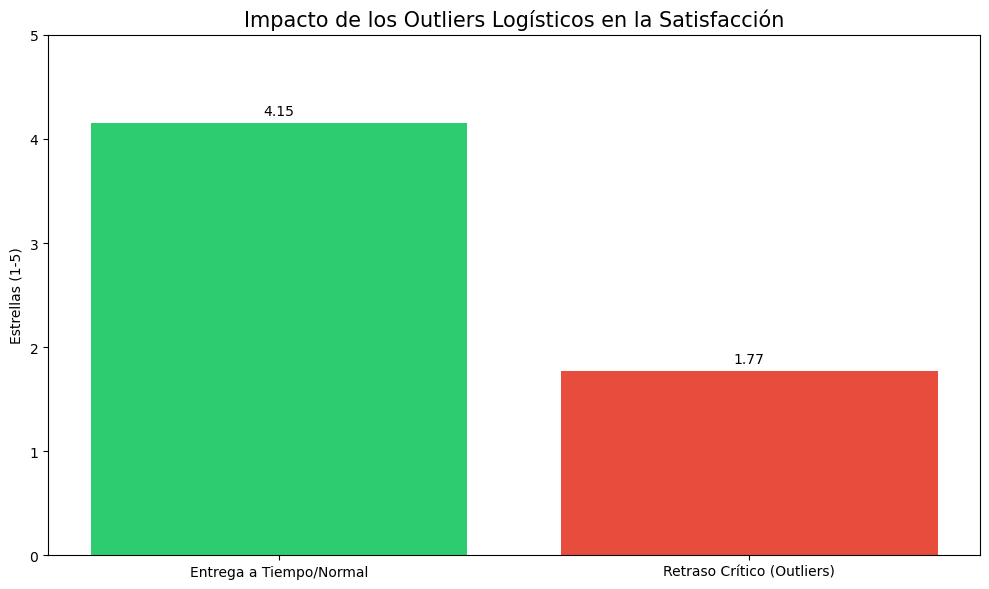

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

resumen_impacto = pd.DataFrame({
    'Categoría': ['Entrega a Tiempo/Normal', 'Retraso Crítico (Outliers)'],
    'Review Score Promedio': [4.15, 1.77]
})

colors = ['#2ecc71', '#e74c3c']

plt.figure(figsize=(10, 6))
bars = plt.bar(resumen_impacto['Categoría'],
               resumen_impacto['Review Score Promedio'],
               color=colors)

# Etiquetas encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}',
                 (bar.get_x() + bar.get_width()/2, height),
                 ha='center', va='center',
                 xytext=(0, 9), textcoords='offset points')

plt.title('Impacto de los Outliers Logísticos en la Satisfacción', fontsize=15)
plt.ylim(0, 5)
plt.ylabel('Estrellas (1-5)')
plt.xlabel('')
plt.tight_layout()
plt.show()

## 3. Recomendaciones y Plan de Acción
* Objetivo: Traducir los datos en soluciones de negocio (puntos de dolor vs. propuestas de mejora).
* Foco: Optimización de la red en RJ y gestión de Sellers con retrasos catastróficos.

## 4. Próximo Pasos: Automatización y BI
* Objetivo: Definir la transición hacia un modelo de reporte automáticamente y la creación del Dashboard interactivo.
* Tecnologías: Power BI y Python Scripts para automatización de reportes Excel.